In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

print(dir(iris))
print(iris.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.2

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])

print(df[:50].head())
print(df[51:99].head())
print(df[100:].head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6   

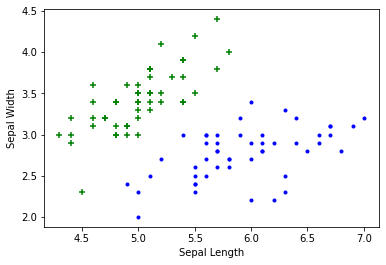

In [6]:
import matplotlib.pyplot as plt

setosa_df = df[:50]
versicolor_df = df[50:100]
virginica_df = df[100:]

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(setosa_df['sepal length (cm)'], setosa_df['sepal width (cm)'],color="green",marker='+')
plt.scatter(versicolor_df['sepal length (cm)'], versicolor_df['sepal width (cm)'],color="blue",marker='.')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x = df.drop(['target','flower_name'], axis='columns')
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = SVC(C =2, gamma=10)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9333333333333333

In [14]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# logspace: create an array of evenly spaced values between two numbers on the logarithmic scale
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

grid.fit(x_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 100.0, 'gamma': 0.01} with a score of 0.96
